In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds
from tensorflow.keras.models import Model

import seaborn as sns

import pandas as pd
import matplotlib.pyplot as plt


time: 1.85 s (started: 2021-05-25 18:20:56 +00:00)


In [ ]:
# from tensorflow.keras import mixed_precision

# policy = mixed_precision.Policy('mixed_float16')
# mixed_precision.set_global_policy(policy)

time: 1.12 ms (started: 2021-05-25 18:20:57 +00:00)


In [ ]:
(ds_train, ds_val, ds_test), ds_info = tfds.load(
    'cifar10',
    data_dir = "/content/drive/MyDrive/Colab Notebooks/Datasets/TensorflowDatasets",
    split=['train[:80%]', 'train[80%:]', 'test'],
    
    with_info=True,
    as_supervised=True
)


time: 765 ms (started: 2021-05-25 18:20:57 +00:00)


In [ ]:
print(ds_info)

tfds.core.DatasetInfo(
    name='cifar10',
    version=3.0.2,
    description='The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.',
    homepage='https://www.cs.toronto.edu/~kriz/cifar.html',
    features=FeaturesDict({
        'id': Text(shape=(), dtype=tf.string),
        'image': Image(shape=(32, 32, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=60000,
    splits={
        'test': 10000,
        'train': 50000,
    },
    supervised_keys=('image', 'label'),
    citation="""@TECHREPORT{Krizhevsky09learningmultiple,
        author = {Alex Krizhevsky},
        title = {Learning multiple layers of features from tiny images},
        institution = {},
        year = {2009}
    }""",
    redistribution_info=,
)

time: 2.29 ms (started: 2021-05-25 18:20:58 +00:00)


In [ ]:
print(type(ds_train))

<class 'tensorflow.python.data.ops.dataset_ops.PrefetchDataset'>
time: 2.39 ms (started: 2021-05-25 18:20:58 +00:00)


In [ ]:
# get_label_name = ds_info.features['label'].int2str

# image, label = next(iter(ds_train))
# _ = plt.imshow(image)
# _ = plt.title(get_label_name(label))

time: 1.63 ms (started: 2021-05-25 18:20:58 +00:00)


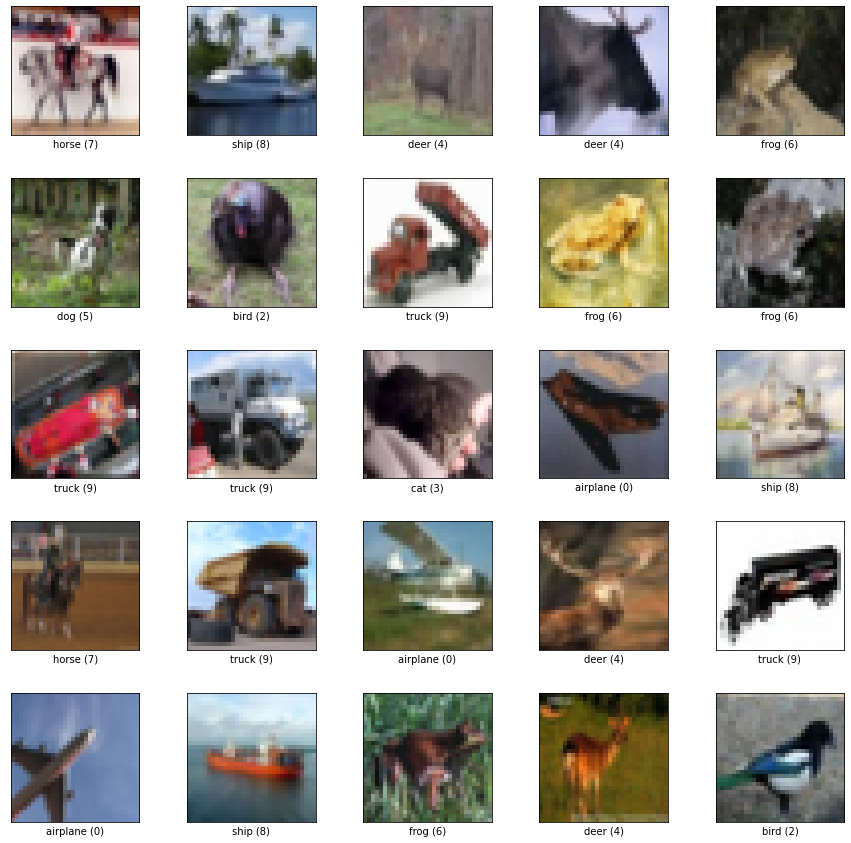

time: 978 ms (started: 2021-05-25 18:20:58 +00:00)


In [ ]:
fig = tfds.show_examples(ds_train, ds_info, rows = 5, cols = 5)

In [ ]:
img_height = img_width = 32

print(img_height)
print(img_width)


AUTOTUNE = tf.data.AUTOTUNE
BATCH_SIZE = 64







32
32
time: 3.06 ms (started: 2021-05-25 18:20:59 +00:00)


In [ ]:
def downscale_img(image, label):
  image = tf.image.resize(image, [img_height, img_width])
  # image = tf.reshape(-1,img_height*img_width)
  return image, label



ds_train = ds_train.map(downscale_img, num_parallel_calls=AUTOTUNE)
ds_val = ds_val.map(downscale_img, num_parallel_calls=AUTOTUNE)
ds_test = ds_test.map(downscale_img, num_parallel_calls=AUTOTUNE)


time: 96.5 ms (started: 2021-05-25 18:20:59 +00:00)


In [ ]:
def normalize_img(image, label):
    return tf.cast(image, tf.float32) / 255.0, label

def configure_for_performance(ds):
    ds = ds.map(normalize_img, num_parallel_calls = AUTOTUNE)
    # ds = ds.cache("Cache")
    ds = ds.shuffle(buffer_size=256)
    ds = ds.batch(BATCH_SIZE)
    ds = ds.prefetch(buffer_size=AUTOTUNE)
    return ds

# def configure_for_performance_2(ds):
#     ds = ds.map(normalize_img, num_parallel_calls = AUTOTUNE)
#     ds = ds.cache("Cache")
#     ds = ds.shuffle(buffer_size=256)
#     ds = ds.batch(BATCH_SIZE)
#     ds = ds.prefetch(buffer_size=AUTOTUNE)
#     return ds

def configure_for_performance_3(ds):
    ds = ds.map(normalize_img, num_parallel_calls = AUTOTUNE)
    ds = ds.batch(BATCH_SIZE)
    ds = ds.prefetch(buffer_size=AUTOTUNE)
    return ds

time: 10.9 ms (started: 2021-05-25 18:20:59 +00:00)


In [ ]:
ds_train = configure_for_performance(ds_train)
ds_val = configure_for_performance_3(ds_val)
ds_test = configure_for_performance_3(ds_test)


time: 59.8 ms (started: 2021-05-25 18:20:59 +00:00)


In [ ]:
for image, label in ds_train.take(1):
  print("Image shape: ", image.numpy().shape)
  print("Label: ", label.numpy())

for image, label in ds_val.take(1):
  print("Image shape: ", image.numpy().shape)
  print("Label: ", label.numpy())
    
for image, label in ds_test.take(1):
  print("Image shape: ", image.numpy().shape)
  print("Label: ", label.numpy())


Image shape:  (64, 32, 32, 3)
Label:  [2 7 9 2 8 2 3 7 8 8 9 3 0 8 3 8 3 4 6 5 3 3 9 7 9 3 9 8 1 6 8 2 1 7 6 6 0
 4 8 9 8 8 2 5 1 5 8 2 4 9 7 7 0 1 3 9 3 8 3 4 8 3 6 6]
Image shape:  (64, 32, 32, 3)
Label:  [4 0 4 7 6 6 6 0 2 8 4 0 8 7 9 5 5 0 1 6 5 6 6 6 2 8 8 3 1 3 2 7 5 5 1 4 5
 1 2 2 3 1 3 0 0 7 5 1 2 5 8 2 5 8 1 3 7 3 6 4 6 9 2 4]
Image shape:  (64, 32, 32, 3)
Label:  [7 0 6 9 5 1 7 0 3 2 7 2 7 9 6 8 8 8 7 9 4 2 3 5 0 0 2 8 1 8 2 0 7 2 0 0 9
 1 0 5 1 5 0 3 5 0 2 0 5 3 7 4 1 4 2 5 1 5 2 0 7 2 2 1]
time: 373 ms (started: 2021-05-25 18:20:59 +00:00)


In [ ]:
num_classes = ds_info.features["label"].num_classes


# Creating model
model = tf.keras.applications.EfficientNetB0(
    include_top=False, input_shape=(img_height, img_width, 3),
    classes=num_classes, weights='imagenet') #, pooling='avg')


x = model.output

x = layers.GlobalAveragePooling2D()(x)

# output layer
predictions = layers.Dense(num_classes, activation="softmax")(x)

model = Model(inputs = model.input, outputs = predictions)
  
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 32, 32, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 32, 32, 3)    7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 33, 33, 3)    0           normalization[0][0]              
______________________________________________________________________________________________

In [ ]:
from tensorflow.keras.optimizers import Adamax

# Model compilation
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adamax(0.0001),
              metrics=['accuracy'])


# Training model
model_history = model.fit(ds_train,
                          epochs=30,
                          validation_data=ds_val,
                          verbose=1)


path = '/content/drive/MyDrive/Colab Notebooks/Notebooks/Models/EfficientNetB0_Cifar10_Base/'
model.save(path)

Epoch 1/30
625/625 [==============================] - 44s 58ms/step - loss: 2.2443 - accuracy: 0.2223 - val_loss: 2.6322 - val_accuracy: 0.1071
Epoch 2/30
625/625 [==============================] - 29s 47ms/step - loss: 1.8255 - accuracy: 0.3546 - val_loss: 2.1025 - val_accuracy: 0.2837
Epoch 3/30
625/625 [==============================] - 29s 47ms/step - loss: 1.6227 - accuracy: 0.4273 - val_loss: 1.8007 - val_accuracy: 0.3680
Epoch 4/30
625/625 [==============================] - 29s 47ms/step - loss: 1.4855 - accuracy: 0.4766 - val_loss: 2.2692 - val_accuracy: 0.2779
Epoch 5/30
625/625 [==============================] - 29s 46ms/step - loss: 1.3792 - accuracy: 0.5113 - val_loss: 2.2818 - val_accuracy: 0.2965
Epoch 6/30
625/625 [==============================] - 30s 47ms/step - loss: 1.2897 - accuracy: 0.5432 - val_loss: 1.8911 - val_accuracy: 0.3775
Epoch 7/30
625/625 [==============================] - 29s 47ms/step - loss: 1.2102 - accuracy: 0.5701 - val_loss: 2.1752 - val_accuracy:

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/Notebooks/Models/EfficientNetB0_Cifar10_Base/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/Notebooks/Models/EfficientNetB0_Cifar10_Base/assets


time: 19min 3s (started: 2021-05-25 18:21:01 +00:00)


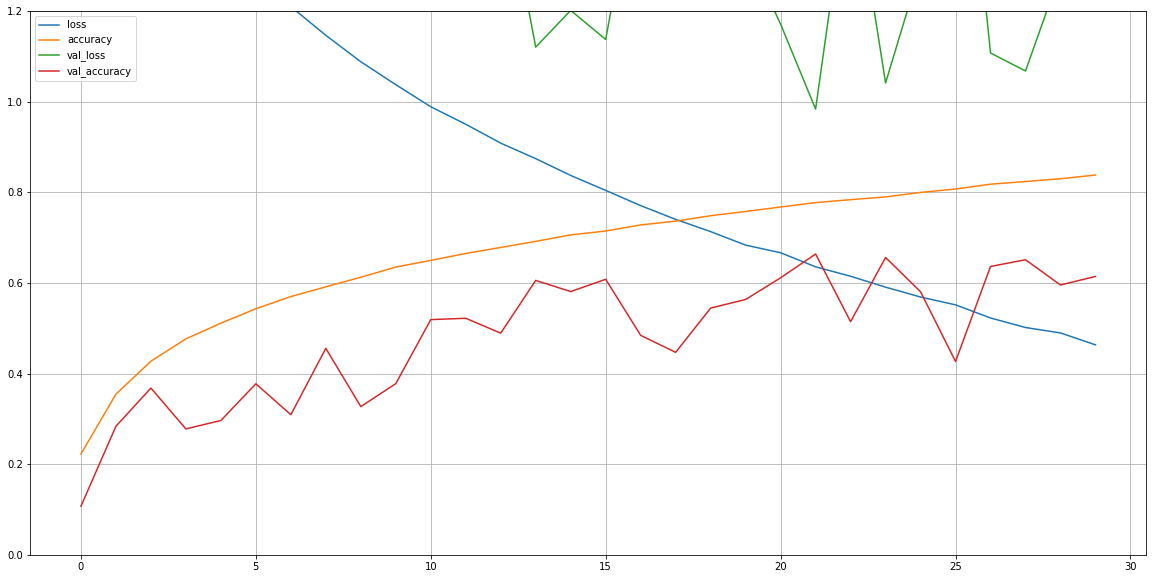

time: 261 ms (started: 2021-05-25 18:40:05 +00:00)


In [ ]:


pd.DataFrame(model_history.history).plot(figsize=(20, 10))
plt.grid(True)
plt.gca().set_ylim(0, 1.2)
plt.show()

In [ ]:
loss_value, acc = model.evaluate(ds_test)

print(f"Test Accuracy: {(acc*100):.3f}%")
print(f"Loss: {loss_value:.3f}%")

157/157 [==============================] - 3s 20ms/step - loss: 1.2906 - accuracy: 0.6127
Test Accuracy: 61.270%
Loss: 1.291%
time: 5.18 s (started: 2021-05-25 18:40:05 +00:00)
